## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
# import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128],
              drop_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation="relu",
                                   name= "hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drop_ratio)(x)
        else:
            x = keras.layers.Dense(units = n_units, activation="relu",
                                   name = "hidden_layer"+str(i+1))(x)
            x = Dropout(drop_ratio)(x)
    
    out = keras.layers.Dense(units = output_units, activation="softmax",
                             name = "output_layer")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs= [out])   
    return model

In [9]:
"""Code Here
設定超參數
"""
Learning_rate = 1e-3
Epochs = 50
Batch_size = 256
# Momentum = 0.95
Num_neurons = [[512, 256, 128],
               [512, 256, 128, 64], 
               [512, 256, 128, 64, 32]]
Dropout_exp = [0.25, 0.30]

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, N_neurons in enumerate(Num_neurons):
    for j, D_exp in enumerate(Dropout_exp):
        model = build_mlp(input_shape=x_train.shape[1:],
                          num_neurons=N_neurons,
                          drop_ratio=D_exp)
        model.summary()
        optimizer = keras.optimizers.Adam(lr=Learning_rate)
        model.compile(loss="categorical_crossentropy",
                      metrics = ["accuracy"],
                      optimizer = optimizer)
        model.fit(x_train, y_train,
                  epochs = Epochs,
                  batch_size = Batch_size,
                  validation_data = (x_test, y_test),
                  shuffle = True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        
        exp_name_tag = "exp-%s-%s" %(str(i), str(D_exp))
        results[exp_name_tag] = {"train-loss": train_loss,
                                 "valid-loss": valid_loss,
                                 "train-acc": train_acc, 
                                 "valid-acc": valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0   

Epoch 45/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5077 - accuracy: 0.4585 - val_loss: 1.4915 - val_accuracy: 0.4842
Epoch 46/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5054 - accuracy: 0.4569 - val_loss: 1.4741 - val_accuracy: 0.4815
Epoch 47/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.5007 - accuracy: 0.4610 - val_loss: 1.4811 - val_accuracy: 0.4737
Epoch 48/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.4943 - accuracy: 0.4623 - val_loss: 1.4596 - val_accuracy: 0.4865
Epoch 49/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4955 - accuracy: 0.4628 - val_loss: 1.4929 - val_accuracy: 0.4790
Epoch 50/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.4874 - accuracy: 0.4646 - val_loss: 1.4832 - val_accuracy: 0.4873
Model: "model_2"
_________________________________________________________________
Layer (type)              

50000/50000 [==============================] - 5s 95us/step - loss: 1.5957 - accuracy: 0.4265 - val_loss: 1.5425 - val_accuracy: 0.4567
Epoch 41/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5907 - accuracy: 0.4251 - val_loss: 1.5566 - val_accuracy: 0.4560
Epoch 42/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5904 - accuracy: 0.4256 - val_loss: 1.5377 - val_accuracy: 0.4616
Epoch 43/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.5906 - accuracy: 0.4256 - val_loss: 1.5372 - val_accuracy: 0.4588
Epoch 44/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5884 - accuracy: 0.4260 - val_loss: 1.5562 - val_accuracy: 0.4503
Epoch 45/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5893 - accuracy: 0.4256 - val_loss: 1.5465 - val_accuracy: 0.4476
Epoch 46/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.5797 - accuracy: 0.4295 - val_loss: 1.52

50000/50000 [==============================] - 6s 110us/step - loss: 1.5763 - accuracy: 0.4385 - val_loss: 1.4992 - val_accuracy: 0.4718
Epoch 34/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.5753 - accuracy: 0.4382 - val_loss: 1.4939 - val_accuracy: 0.4713
Epoch 35/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.5703 - accuracy: 0.4379 - val_loss: 1.4901 - val_accuracy: 0.4702
Epoch 36/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5748 - accuracy: 0.4368 - val_loss: 1.5313 - val_accuracy: 0.4591
Epoch 37/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.5651 - accuracy: 0.4406 - val_loss: 1.4981 - val_accuracy: 0.4681
Epoch 38/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.5681 - accuracy: 0.4428 - val_loss: 1.5060 - val_accuracy: 0.4647
Epoch 39/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5588 - accuracy: 0.4417 - val_loss:

50000/50000 [==============================] - 6s 114us/step - loss: 1.7247 - accuracy: 0.3789 - val_loss: 1.6301 - val_accuracy: 0.4305
Epoch 27/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.7223 - accuracy: 0.3800 - val_loss: 1.6435 - val_accuracy: 0.4203
Epoch 28/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.7169 - accuracy: 0.3848 - val_loss: 1.6616 - val_accuracy: 0.4099
Epoch 29/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.7163 - accuracy: 0.3826 - val_loss: 1.6153 - val_accuracy: 0.4378
Epoch 30/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.7060 - accuracy: 0.3835 - val_loss: 1.6339 - val_accuracy: 0.4321
Epoch 31/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.7107 - accuracy: 0.3833 - val_loss: 1.6570 - val_accuracy: 0.4185: 0.38
Epoch 32/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.7008 - accuracy: 0.3875 - val

Epoch 18/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.7873 - accuracy: 0.3487 - val_loss: 1.7204 - val_accuracy: 0.3941
Epoch 19/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7752 - accuracy: 0.3501 - val_loss: 1.7032 - val_accuracy: 0.3951
Epoch 20/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7760 - accuracy: 0.3544 - val_loss: 1.6975 - val_accuracy: 0.3968
Epoch 21/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.7681 - accuracy: 0.3575 - val_loss: 1.7142 - val_accuracy: 0.3818
Epoch 22/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.7651 - accuracy: 0.3625 - val_loss: 1.6990 - val_accuracy: 0.3931
Epoch 23/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.7561 - accuracy: 0.3639 - val_loss: 1.6784 - val_accuracy: 0.3964
Epoch 24/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7507 - accuracy: 0.3616

Epoch 10/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.9198 - accuracy: 0.2847 - val_loss: 1.8486 - val_accuracy: 0.3238
Epoch 11/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.8993 - accuracy: 0.2893 - val_loss: 1.8600 - val_accuracy: 0.3355
Epoch 12/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.8939 - accuracy: 0.2943 - val_loss: 1.8213 - val_accuracy: 0.3278
Epoch 13/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8836 - accuracy: 0.3002 - val_loss: 1.8287 - val_accuracy: 0.3373
Epoch 14/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.8803 - accuracy: 0.3001 - val_loss: 1.7994 - val_accuracy: 0.3496
Epoch 15/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.8756 - accuracy: 0.3032 - val_loss: 1.8183 - val_accuracy: 0.3437
Epoch 16/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8671 - accuracy: 0.3063

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

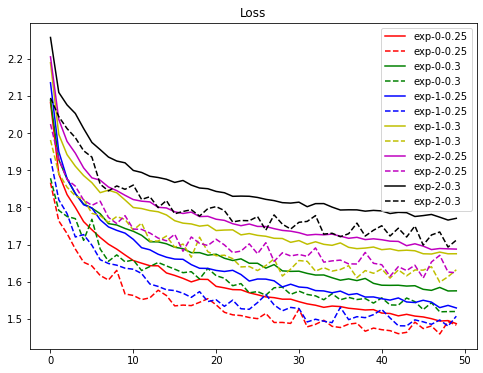

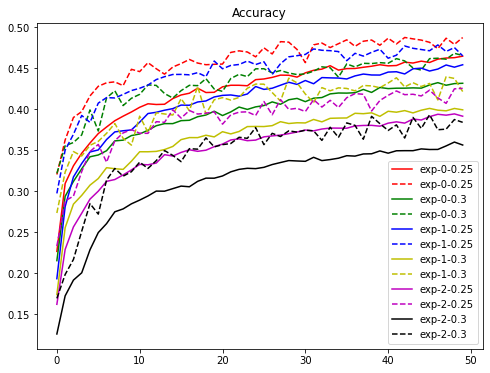

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-loss"])), results[cond]["train-loss"], "-", label = cond, c = color_bar[i])
    plt.plot(range(len(results[cond]["valid-loss"])), results[cond]["valid-loss"], "--", label = cond, c = color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], "-", label = cond, c = color_bar[i])
    plt.plot(range(len(results[cond]["valid-acc"])), results[cond]["valid-acc"], "--", label = cond, c = color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()